In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
%matplotlib inline

In [37]:
clf = svm.OneClassSVM(nu=0.01, kernel="rbf", gamma=5)
data = np.zeros((1000,1))
data[:,0] = 2*(-0.5 + np.random.rand(1000))
clf.fit(data)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=100, kernel='rbf',
      max_iter=-1, nu=0.01, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

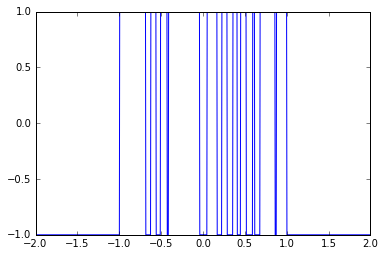

In [38]:
x=np.linspace(-2,2,1000)
y = list(map(lambda x :clf.predict(x),x))
plt.plot(x,y)

In [19]:
np.shape(data)

(1000, 1)